In [39]:
from dataviz import data_slice,data_timeplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

# Entrainement modèle prophet

In [50]:
from fbprophet import Prophet
x_train=pd.read_csv('training_input_qFI2jug.csv', index_col="Horodate_UTC")
x_train.index = pd.DatetimeIndex(x_train.index)



In [51]:

liste_dates = x_train.index.tolist()

for dt in liste_dates :
    x_train.at[dt, 'sort'] = dt.strftime('%m%d%H%S')

x_train['sort'].astype(int)

df_month = x_train.sort_values(by='sort', ascending=True)
df_month.head(20)
df_month = df_month.interpolate(str="linear", axis=0).ffill().bfill()
df = df_month.sort_values(by='IDS', ascending=True)

x_train.drop('sort', axis=1)

x_train['Pseudo rayonnement'] = df['Pseudo rayonnement']


X_train_brut=x_train

In [53]:
X_train_brut.rename(columns={'Consommations totale (W)':'y'},inplace=True)
X_train_brut['ds']=X_train_brut.index
prophet.fit(X_train_brut.loc[:date(2017,6,30)])


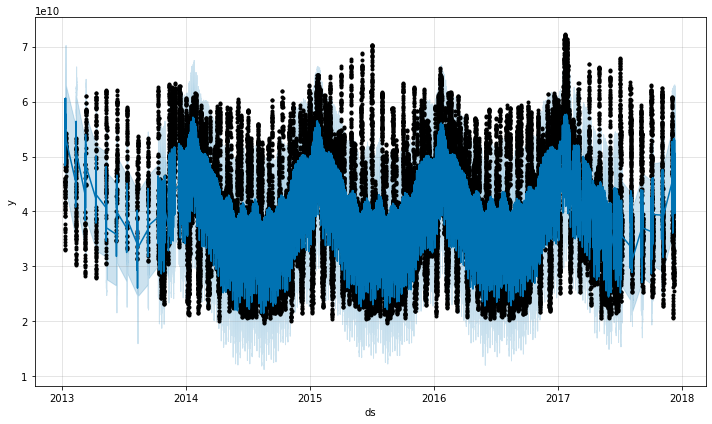

In [54]:
m=prophet
future = m.make_future_dataframe(periods=96, freq = 'H')
forecast = m.predict(future)
fig = m.plot(forecast)

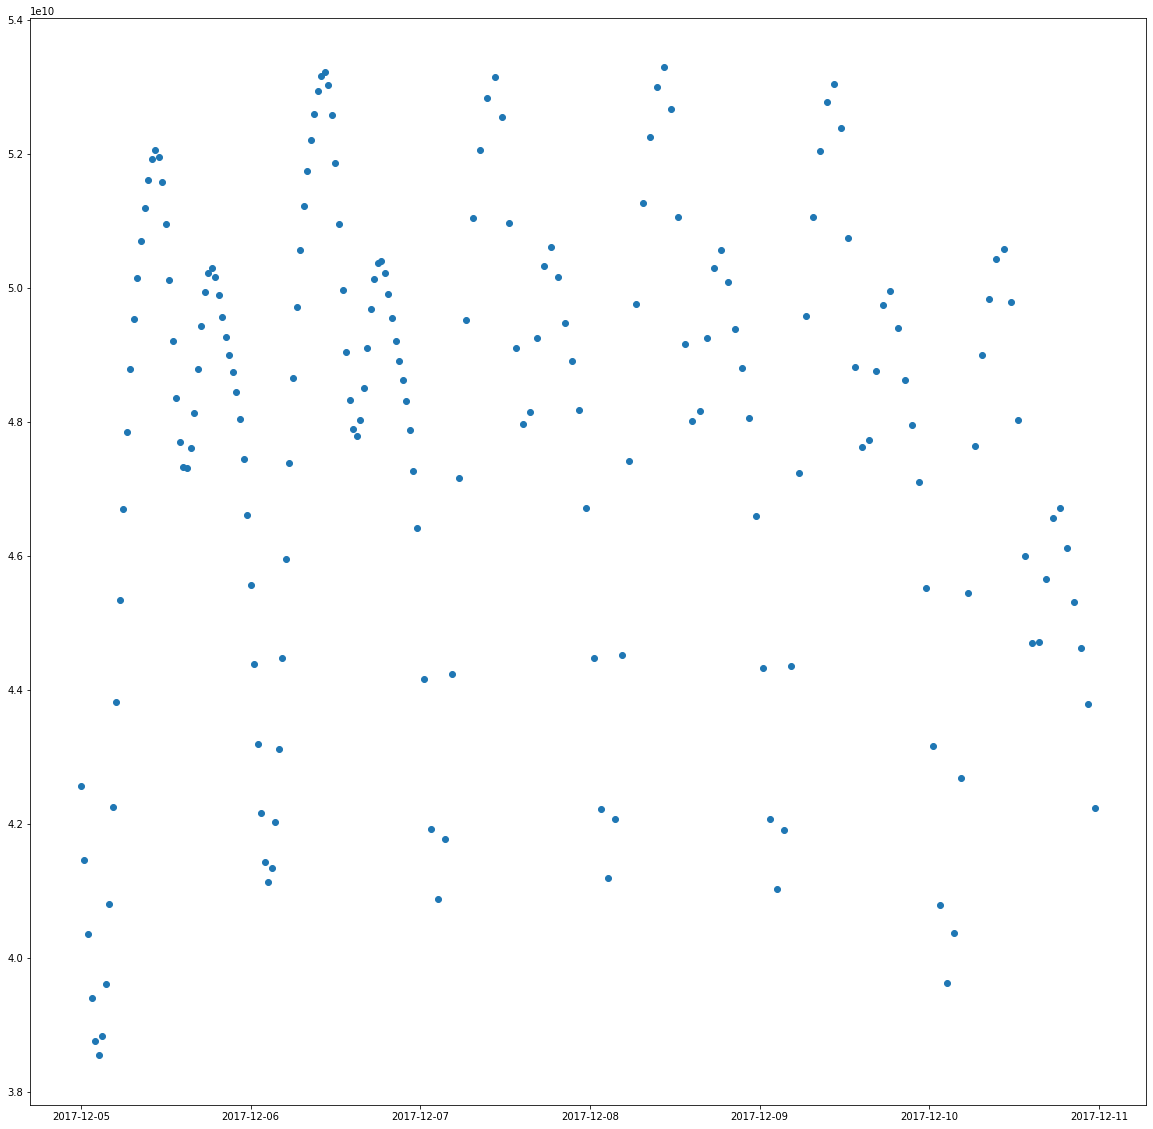

In [92]:
fig=plt.figure(figsize=(20,20))
plt.plot_date(forecast.iloc[65141-192:65141]['ds'],forecast.iloc[65141-192:65141]['yhat'])